Implementing the K-Means Algorithm from scratch.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Auxiliary functions:

In [2]:
def distance(point:tuple[float, float], centroid:tuple[float,float]) -> int:
  '''
  Calculates distance between 2D points.
  '''
  return np.sqrt((point[0] - centroid[0])**2 + (point[1] - centroid[1])**2)

def generate_points(k:int, min:int, max:int) ->list[tuple[int, int]]:
  '''
  Generates a list of k points, between min-max range.
  '''
  return [(random.uniform(min, max), random.uniform(min,max)) for _ in range(k)]

def compare_centroids(old_centroids:list[set[tuple[float, float]]], new_centroids:list[set[tuple[float, float]]]) -> bool:
  '''
  Returns True when the centroids estabilizes.
  '''
  for i in range(len(old_centroids)):
    if distance(new_centroids[i], old_centroids[i]) > 10**-7:
      return False
  return True


Algorithm:

In [3]:
def kmeans(points:list[tuple[float, float]], k:int, min:int, max:int) -> (list[tuple[float, float]], list[set[tuple[float, float]]]):
  centroids = generate_points(k, min, max)

  # each set contains the points attributed to the ith centroid
  attr_points = [set() for _ in range(k)]

  count = 0
  while (count < 1000) :
    for p in points:
      min = float('inf')
      for j in range(k):
        d = distance(p, centroids[j])
        if d < min:
          min = d
          closest_j = j
      attr_points[closest_j].add(p)

    old_centroids = centroids

    for i in range(k):
      try:
        mean_x = sum(x for x, _ in attr_points[i])/len(attr_points[i])
        mean_y = sum(y for _, y in attr_points[i])/len(attr_points[i])

        centroids[i] = (mean_x, mean_y)
      except ZeroDivisionError:
        centroids[i] = old_centroids[i]

    count = count + 1 and count < 1000
    if ~count:
      return centroids, attr_points

    for i in range(k):
      attr_points[i].clear()
  return centroids, attr_points

Running:

In [4]:
random.seed(26)

# generating a hundred points randomly
points = generate_points(100, 0, 20)

# clustering
k_centroids, clusters = kmeans(points, 2, 0, 20)

Testing the implementation by comparing with the KMeans from sklearn.

In [5]:
kmeans= KMeans(n_clusters=2)

# training
kmeans.fit(points)

# obtaining labels
sklearn_labels = kmeans.labels_

# centroids
sklearn_centroids = kmeans.cluster_centers_


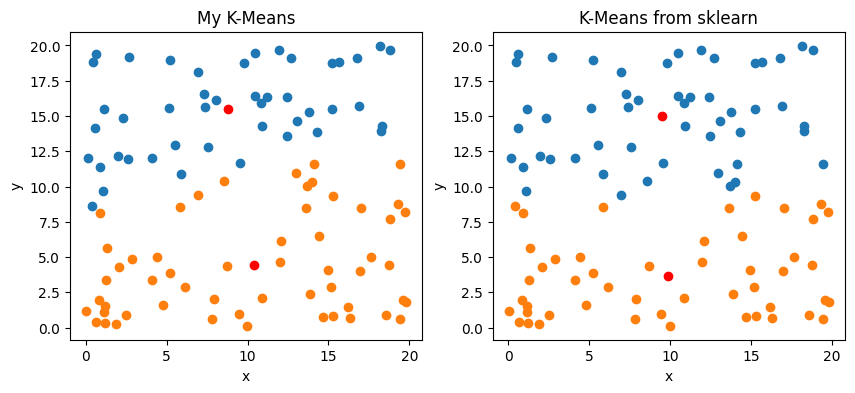

In [6]:
# plotting both results for comparison

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

x_centroids = [x for x,_ in k_centroids]
y_centroids = [y for _,y in k_centroids]

for k_points in clusters:
  x_points = [x for x,_ in k_points]
  y_points = [y for _,y in k_points]
  axes[0].scatter(x_points, y_points)
axes[0].set_title('My K-Means')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

axes[0].scatter(x_centroids, y_centroids, color='red')

for i in range(2):
    points_array = np.array(points)[sklearn_labels == i]
    axes[1].scatter(points_array[:, 0], points_array[:, 1])

# Plotando os centroides
axes[1].scatter(sklearn_centroids[:, 0], sklearn_centroids[:, 1], color='red', label='Centroides')

axes[1].set_title('K-Means from sklearn')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
plt.show()